In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
from scipy.stats import linregress
rcParams['figure.figsize'] = 14,10
plt.style.use('ggplot')

# NY Times Data
us_counties = "covid_data/us-counties.csv"
us_states = "covid_data/us-states.csv"
us_total = "covid_data/us.csv"
counties = pd.read_csv(us_counties)
states = pd.read_csv(us_states)
us = pd.read_csv(us_total)
us

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
...,...,...,...
173,2020-07-12,3318347,134977
174,2020-07-13,3379859,135402
175,2020-07-14,3445483,136356
176,2020-07-15,3513846,137327


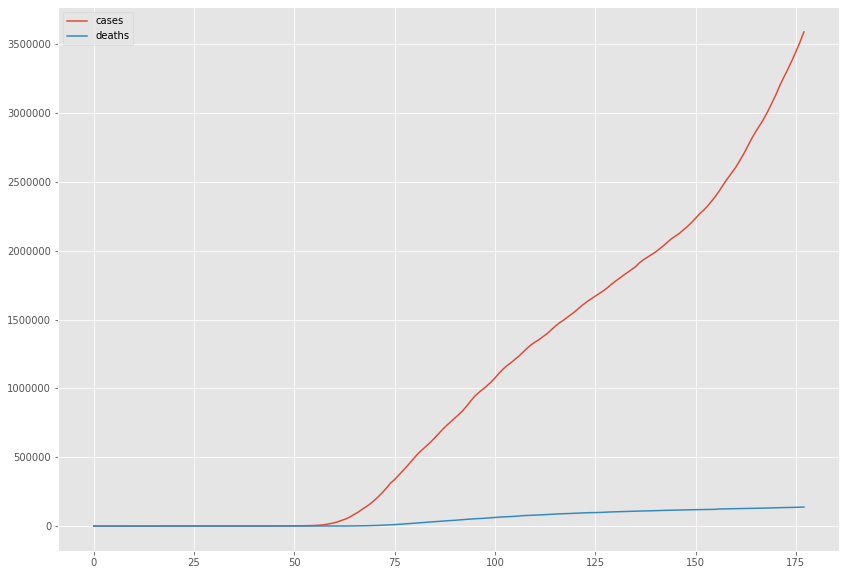

In [2]:
us.plot();
#states[['date','state','cases','deaths']].plot();
#counties.plot();

In [3]:
trump_data = "approval_ratings/trump_ratings.csv"
trump_ratings = pd.read_csv(trump_data)
trump_ratings.head()

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,...,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,7/17/2020,1/20/2017,1/22/2017,Morning Consult,B/C,1992.0,rv,0.680029,...,37.0,45.136218,37.901041,NaN,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,49249,77261,1/23/2017,7/17/2020 9:53
1,Donald Trump,All polls,7/17/2020,1/20/2017,1/22/2017,Gallup,B,1500.0,a,0.262323,...,45.0,45.761409,43.566085,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,7/17/2020 9:53
2,Donald Trump,All polls,7/17/2020,1/20/2017,1/24/2017,Ipsos,B-,1632.0,a,0.153481,...,45.2,43.122312,43.865379,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,7/17/2020 9:53
3,Donald Trump,All polls,7/17/2020,1/21/2017,1/23/2017,Gallup,B,1500.0,a,0.242845,...,46.0,45.761409,44.566085,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,7/17/2020 9:53
4,Donald Trump,All polls,7/17/2020,1/20/2017,1/25/2017,Quinnipiac University,B+,1190.0,rv,1.514172,...,44.0,37.646971,42.745973,NaN,NaN,https://poll.qu.edu/national/release-detail?Re...,49260,77272,1/26/2017,7/17/2020 9:53


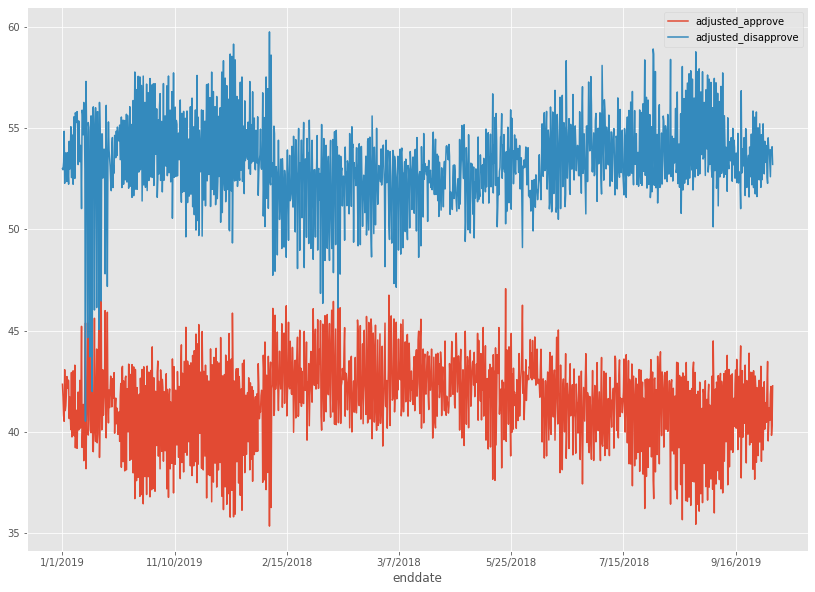

In [4]:
avg_trump_ratings =trump_ratings.groupby('enddate').agg({'adjusted_approve': 'mean', 'adjusted_disapprove': 'mean'})
avg_trump_ratings.plot();
#trump_ratings.plot(kind='line', x='enddate', y='disapprove')

In [5]:
# John's Hopkins Data
jh_data = "covid_data/time_series_covid19_deaths_US.csv"
jh_covid = pd.read_csv(jh_data)
jh_covid.drop(columns=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Lat', 'Long_', 'Combined_Key', 'Population', 'Country_Region'], inplace=True)
jh_covid.head(10)

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20
0,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
2,Northern Mariana Islands,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
3,Puerto Rico,0,0,0,0,0,0,0,0,0,...,159,159,159,167,167,167,169,171,172,177
4,Virgin Islands,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
5,Alabama,0,0,0,0,0,0,0,0,0,...,12,13,14,14,15,15,17,18,19,20
6,Alabama,0,0,0,0,0,0,0,0,0,...,9,10,11,11,11,11,11,12,13,13
7,Alabama,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,3,3,3,3
8,Alabama,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,2,2,2,2
9,Alabama,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [6]:
jh_pivot = pd.pivot_table(jh_covid, index=['Province_State'], aggfunc=np.sum, fill_value=0)
jh_pivot.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/16/20,7/17/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,1230,1265,985,1006,1007,1007,1007,1033,1058,1068
Alaska,0,0,0,0,0,0,0,0,0,0,...,17,17,14,15,16,16,16,17,17,17
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,0,0,0,0,0,0,...,2492,2583,1764,1798,1817,1825,1829,1927,1963,2038
Arkansas,0,0,0,0,0,0,0,0,0,0,...,341,353,279,281,286,287,292,301,305,309
California,0,0,0,0,0,0,0,0,0,0,...,7489,7603,6265,6315,6334,6373,6441,6573,6718,6859
Colorado,0,0,0,0,0,0,0,0,0,0,...,1745,1751,1701,1701,1701,1701,1691,1696,1704,1706
Connecticut,0,0,0,0,0,0,0,0,0,0,...,4389,4396,4326,4335,4335,4335,4338,4338,4343,4348
Delaware,0,0,0,0,0,0,0,0,0,0,...,521,521,510,512,512,512,512,514,515,517


# Analysis of NYT Deaths vs Trump Approval Numbers

In [7]:
# To start we need one dataframe, with Four columns. Date, Total Deaths, Trump Approval Rating and Trump disapproval rating

# We can get the date the deaths by looking at the NYT data.
df_deathapproval = us[['date','deaths']]
df_deathapproval['date_clean'] = pd.to_datetime(df_deathapproval['date'])

In [8]:
# So now we need to get the approval rating and disapproval rating by date
from datetime import datetime
trump_ratings['enddate_clean'] = pd.to_datetime(trump_ratings['enddate'])
trump_ratings_2020 = trump_ratings.loc[trump_ratings['enddate_clean'] >= '01-21-2020'] 

trump_ratings_2020_grouped = trump_ratings_2020.groupby('enddate_clean')

approval = trump_ratings_2020_grouped['adjusted_approve'].mean()
disapproval = trump_ratings_2020_grouped['adjusted_disapprove'].mean()

#trump_ratings[['startdate','enddate','adjusted_approve']].loc[]

In [9]:
approval_df = pd.DataFrame(approval)
disapproval_df = pd.DataFrame(disapproval)

deathapproval_approve = pd.merge(df_deathapproval, approval_df, how = 'left', left_on = 'date_clean', right_on = 'enddate_clean')
df_approvalfinal = pd.merge(deathapproval_approve, disapproval_df, how = 'left', left_on = 'date_clean', right_on = 'enddate_clean')

df_approvalfinal

,date,deaths,date_clean,adjusted_approve,adjusted_disapprove
0,2020-01-21,0,2020-01-21,43.076130,52.930799
1,2020-01-22,0,2020-01-22,41.966678,53.236632
2,2020-01-23,0,2020-01-23,45.602169,49.896615
3,2020-01-24,0,2020-01-24,42.208675,54.169452
4,2020-01-25,0,2020-01-25,41.138551,54.879570
...,...,...,...,...,...
173,2020-07-12,134977,2020-07-12,39.979799,56.477837
174,2020-07-13,135402,2020-07-13,40.762214,55.909417
175,2020-07-14,136356,2020-07-14,40.948665,54.881739
176,2020-07-15,137327,2020-07-15,40.921901,54.965856


In [129]:
bin_death = df_approvalfinal.groupby([pd.Grouper(key='date_clean', freq='W')])['deaths'].sum().reset_index().sort_values('date_clean')
bin_approve = df_approvalfinal.groupby([pd.Grouper(key='date_clean', freq='W')])['adjusted_approve'].mean().reset_index().sort_values('date_clean')
bin_dis = df_approvalfinal.groupby([pd.Grouper(key='date_clean', freq='W')])['adjusted_disapprove'].mean().reset_index().sort_values('date_clean')
# print(bin_death)
# print(bin_approve)
# print(bin_dis)

frames = [bin_death, bin_approve, bin_dis]
bin_death['approval'] = bin_approve['adjusted_approve']
bin_death['disapproval'] = bin_dis['adjusted_disapprove']
bin = bin_death.rename(columns={'date_clean': 'week'})
bin.columns

Index(['week', 'deaths', 'approval', 'disapproval'], dtype='object')

In [130]:
bin

,week,deaths,approval,disapproval
0,2020-01-26,0,42.713997,53.100508
1,2020-02-02,0,42.608594,53.187860
2,2020-02-09,0,43.220550,51.920645
3,2020-02-16,0,43.494213,52.001329
4,2020-02-23,0,42.599587,53.105975
5,2020-03-01,4,43.195571,52.716095
6,2020-03-08,96,42.583414,52.977333
7,2020-03-15,315,43.007764,52.556184
8,2020-03-22,1677,44.215007,51.919535
9,2020-03-29,10559,44.707252,51.500045


In [19]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install plotly_express

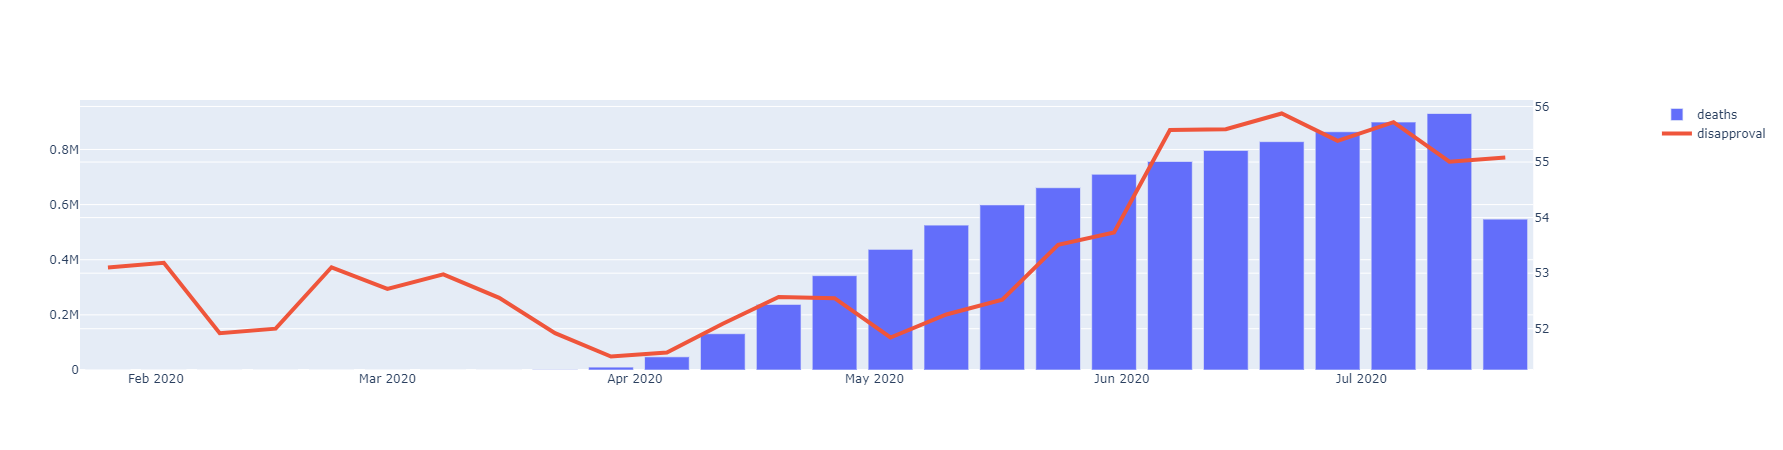

In [103]:
# Make figure overlaying COVID Deaths and Disapproval Ratings
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(go.Bar(x=bin['week'], y=bin['deaths'], name="deaths"), secondary_y=False)

fig.add_trace(go.Scatter(x=bin['week'], y=bin['disapproval'], name="disapproval", ), secondary_y=True)

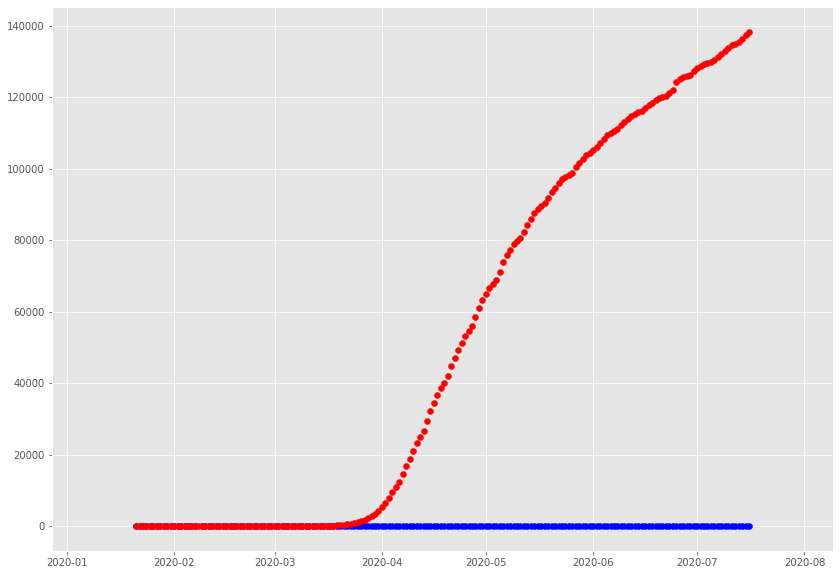

In [19]:
x_data = df_approvalfinal['date_clean']
y_data_approve = df_approvalfinal['adjusted_approve']
y_data_deaths = df_approvalfinal['deaths']

plt.scatter(x = df_approvalfinal['date_clean'], y = df_approvalfinal['adjusted_approve'], c='blue')
plt.scatter(x = df_approvalfinal['date_clean'], y = df_approvalfinal['deaths'], c='red')

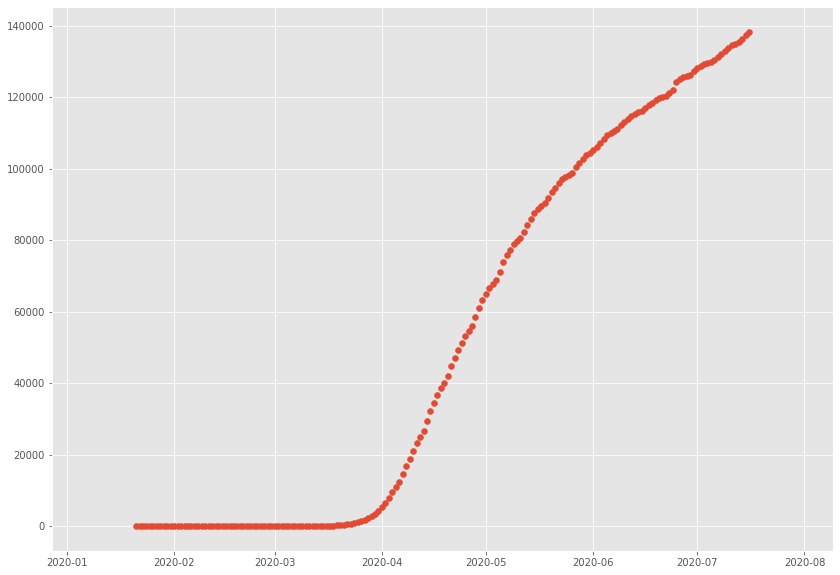

In [11]:
plt.scatter(x = x_data, y = y_data_deaths);

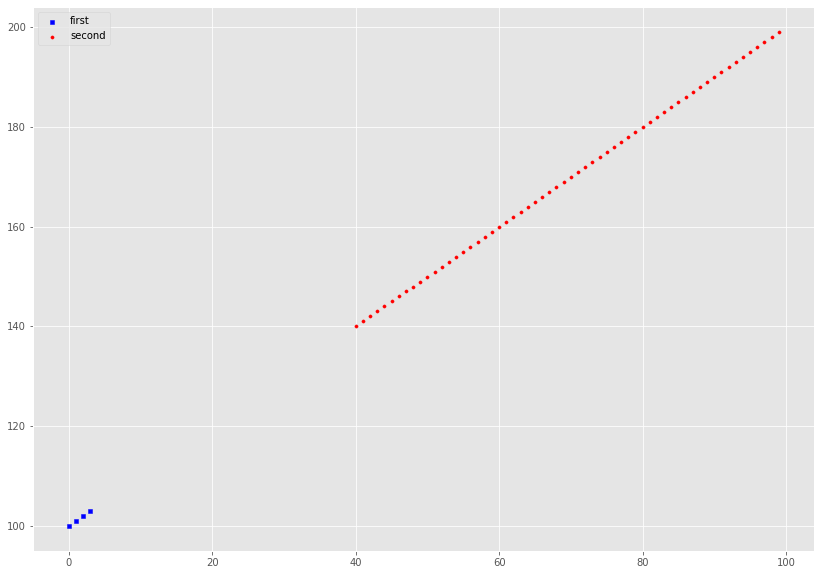

In [12]:
x = range(100)
y = range(100,200)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x[:4], y[:4], s=10, c='b', marker="s", label='first')
ax1.scatter(x[40:],y[40:], s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left');
plt.show()

In [114]:
fig = go.Figure()

# Create axis objects
fig.update_layout(xaxis=bin['week'],
    yaxis=dict(title="COVID-19 Deaths", titlefont=dict(color="#1f77b4"),tickfont=dict(color="#1f77b4")),
    yaxis2=dict(title="Presidential Approval", titlefont=dict(color="#ff7f0e"), tickfont=dict(color="#ff7f0e"), anchor="x", overlaying="y", side="right"),
    yaxis3=dict(title="Presidential Disapproval", titlefont=dict(color="#d62728"), tickfont=dict(color="#d62728"), anchor="free", overlaying="y", side="right",position=0.85))

fig.add_trace(go.Bar(x=bin['week'], y=bin['deaths'], name="deaths"))

fig.add_trace(go.Scatter(x=bin['week'], y=bin['approval'], name="approval", yaxis2="y2"))

fig.add_trace(go.Scatter(x=bin['week'], y=bin['disapproval'], name="disapproval", yaxis3="y3"))

# # Create axis objects
# fig.update_layout(xaxis=dict(bin['week']),
#     yaxis=dict(title="COVID-19 Deaths", titlefont=dict(color="#1f77b4"),tickfont=dict(color="#1f77b4")),
#     yaxis2=dict(title="Presidential Approval", titlefont=dict(color="#ff7f0e"), tickfont=dict(color="#ff7f0e"), anchor="x", overlaying="y", side="right"),
#     yaxis3=dict(title="Presidential Disapproval", titlefont=dict(color="#d62728"), tickfont=dict(color="#d62728"), anchor="free", overlaying="y", side="right",position=0.85))

# Update layout properties
fig.update_layout(title_text="Overlay of COVID Deaths and Presidential Approval/Disapproval", width=800)

fig.show()

ValueError: 
    Invalid value of type 'pandas.core.series.Series' received for the 'xaxis' property of layout
        Received value: 0    2020-01-26
1    2020-02-02
2    2020-02-09
3    2020-02-16
4    2020-02-23
5    2020-03-01
6    2020-03-08
7    2020-03-15
8    2020-03-22
9    2020-03-29
10   2020-04-05
11   2020-04-12
12   2020-04-19
13   2020-04-26
14   2020-05-03
15   2020-05-10
16   2020-05-17
17   2020-05-24
18   2020-05-31
19   2020-06-07
20   2020-06-14
21   2020-06-21
22   2020-06-28
23   2020-07-05
24   2020-07-12
25   2020-07-19
Name: week, dtype: datetime64[ns]

    The 'xaxis' property is an instance of XAxis
    that may be specified as:
      - An instance of :class:`plotly.graph_objs.layout.XAxis`
      - A dict of string/value properties that will be passed
        to the XAxis constructor

        Supported dict properties:
            
            anchor
                If set to an opposite-letter axis id (e.g.
                `x2`, `y`), this axis is bound to the
                corresponding opposite-letter axis. If set to
                "free", this axis' position is determined by
                `position`.
            automargin
                Determines whether long tick labels
                automatically grow the figure margins.
            autorange
                Determines whether or not the range of this
                axis is computed in relation to the input data.
                See `rangemode` for more info. If `range` is
                provided, then `autorange` is set to False.
            calendar
                Sets the calendar system to use for `range` and
                `tick0` if this is a date axis. This does not
                set the calendar for interpreting data on this
                axis, that's specified in the trace or via the
                global `layout.calendar`
            categoryarray
                Sets the order in which categories on this axis
                appear. Only has an effect if `categoryorder`
                is set to "array". Used with `categoryorder`.
            categoryarraysrc
                Sets the source reference on Chart Studio Cloud
                for  categoryarray .
            categoryorder
                Specifies the ordering logic for the case of
                categorical variables. By default, plotly uses
                "trace", which specifies the order that is
                present in the data supplied. Set
                `categoryorder` to *category ascending* or
                *category descending* if order should be
                determined by the alphanumerical order of the
                category names. Set `categoryorder` to "array"
                to derive the ordering from the attribute
                `categoryarray`. If a category is not found in
                the `categoryarray` array, the sorting behavior
                for that attribute will be identical to the
                "trace" mode. The unspecified categories will
                follow the categories in `categoryarray`. Set
                `categoryorder` to *total ascending* or *total
                descending* if order should be determined by
                the numerical order of the values. Similarly,
                the order can be determined by the min, max,
                sum, mean or median of all the values.
            color
                Sets default for all colors associated with
                this axis all at once: line, font, tick, and
                grid colors. Grid color is lightened by
                blending this with the plot background
                Individual pieces can override this.
            constrain
                If this axis needs to be compressed (either due
                to its own `scaleanchor` and `scaleratio` or
                those of the other axis), determines how that
                happens: by increasing the "range" (default),
                or by decreasing the "domain".
            constraintoward
                If this axis needs to be compressed (either due
                to its own `scaleanchor` and `scaleratio` or
                those of the other axis), determines which
                direction we push the originally specified plot
                area. Options are "left", "center" (default),
                and "right" for x axes, and "top", "middle"
                (default), and "bottom" for y axes.
            dividercolor
                Sets the color of the dividers Only has an
                effect on "multicategory" axes.
            dividerwidth
                Sets the width (in px) of the dividers Only has
                an effect on "multicategory" axes.
            domain
                Sets the domain of this axis (in plot
                fraction).
            dtick
                Sets the step in-between ticks on this axis.
                Use with `tick0`. Must be a positive number, or
                special strings available to "log" and "date"
                axes. If the axis `type` is "log", then ticks
                are set every 10^(n*dtick) where n is the tick
                number. For example, to set a tick mark at 1,
                10, 100, 1000, ... set dtick to 1. To set tick
                marks at 1, 100, 10000, ... set dtick to 2. To
                set tick marks at 1, 5, 25, 125, 625, 3125, ...
                set dtick to log_10(5), or 0.69897000433. "log"
                has several special values; "L<f>", where `f`
                is a positive number, gives ticks linearly
                spaced in value (but not position). For example
                `tick0` = 0.1, `dtick` = "L0.5" will put ticks
                at 0.1, 0.6, 1.1, 1.6 etc. To show powers of 10
                plus small digits between, use "D1" (all
                digits) or "D2" (only 2 and 5). `tick0` is
                ignored for "D1" and "D2". If the axis `type`
                is "date", then you must convert the time to
                milliseconds. For example, to set the interval
                between ticks to one day, set `dtick` to
                86400000.0. "date" also has special values
                "M<n>" gives ticks spaced by a number of
                months. `n` must be a positive integer. To set
                ticks on the 15th of every third month, set
                `tick0` to "2000-01-15" and `dtick` to "M3". To
                set ticks every 4 years, set `dtick` to "M48"
            exponentformat
                Determines a formatting rule for the tick
                exponents. For example, consider the number
                1,000,000,000. If "none", it appears as
                1,000,000,000. If "e", 1e+9. If "E", 1E+9. If
                "power", 1x10^9 (with 9 in a super script). If
                "SI", 1G. If "B", 1B.
            fixedrange
                Determines whether or not this axis is zoom-
                able. If true, then zoom is disabled.
            gridcolor
                Sets the color of the grid lines.
            gridwidth
                Sets the width (in px) of the grid lines.
            hoverformat
                Sets the hover text formatting rule using d3
                formatting mini-languages which are very
                similar to those in Python. For numbers, see:
                https://github.com/d3/d3-3.x-api-
                reference/blob/master/Formatting.md#d3_format
                And for dates see:
                https://github.com/d3/d3-3.x-api-
                reference/blob/master/Time-Formatting.md#format
                We add one item to d3's date formatter: "%{n}f"
                for fractional seconds with n digits. For
                example, *2016-10-13 09:15:23.456* with
                tickformat "%H~%M~%S.%2f" would display
                "09~15~23.46"
            layer
                Sets the layer on which this axis is displayed.
                If *above traces*, this axis is displayed above
                all the subplot's traces If *below traces*,
                this axis is displayed below all the subplot's
                traces, but above the grid lines. Useful when
                used together with scatter-like traces with
                `cliponaxis` set to False to show markers
                and/or text nodes above this axis.
            linecolor
                Sets the axis line color.
            linewidth
                Sets the width (in px) of the axis line.
            matches
                If set to another axis id (e.g. `x2`, `y`), the
                range of this axis will match the range of the
                corresponding axis in data-coordinates space.
                Moreover, matching axes share auto-range
                values, category lists and histogram auto-bins.
                Note that setting axes simultaneously in both a
                `scaleanchor` and a `matches` constraint is
                currently forbidden. Moreover, note that
                matching axes must have the same `type`.
            mirror
                Determines if the axis lines or/and ticks are
                mirrored to the opposite side of the plotting
                area. If True, the axis lines are mirrored. If
                "ticks", the axis lines and ticks are mirrored.
                If False, mirroring is disable. If "all", axis
                lines are mirrored on all shared-axes subplots.
                If "allticks", axis lines and ticks are
                mirrored on all shared-axes subplots.
            nticks
                Specifies the maximum number of ticks for the
                particular axis. The actual number of ticks
                will be chosen automatically to be less than or
                equal to `nticks`. Has an effect only if
                `tickmode` is set to "auto".
            overlaying
                If set a same-letter axis id, this axis is
                overlaid on top of the corresponding same-
                letter axis, with traces and axes visible for
                both axes. If False, this axis does not overlay
                any same-letter axes. In this case, for axes
                with overlapping domains only the highest-
                numbered axis will be visible.
            position
                Sets the position of this axis in the plotting
                space (in normalized coordinates). Only has an
                effect if `anchor` is set to "free".
            range
                Sets the range of this axis. If the axis `type`
                is "log", then you must take the log of your
                desired range (e.g. to set the range from 1 to
                100, set the range from 0 to 2). If the axis
                `type` is "date", it should be date strings,
                like date data, though Date objects and unix
                milliseconds will be accepted and converted to
                strings. If the axis `type` is "category", it
                should be numbers, using the scale where each
                category is assigned a serial number from zero
                in the order it appears.
            rangebreaks
                A tuple of :class:`plotly.graph_objects.layout.
                xaxis.Rangebreak` instances or dicts with
                compatible properties
            rangebreakdefaults
                When used in a template (as layout.template.lay
                out.xaxis.rangebreakdefaults), sets the default
                property values to use for elements of
                layout.xaxis.rangebreaks
            rangemode
                If "normal", the range is computed in relation
                to the extrema of the input data. If *tozero*`,
                the range extends to 0, regardless of the input
                data If "nonnegative", the range is non-
                negative, regardless of the input data. Applies
                only to linear axes.
            rangeselector
                :class:`plotly.graph_objects.layout.xaxis.Range
                selector` instance or dict with compatible
                properties
            rangeslider
                :class:`plotly.graph_objects.layout.xaxis.Range
                slider` instance or dict with compatible
                properties
            scaleanchor
                If set to another axis id (e.g. `x2`, `y`), the
                range of this axis changes together with the
                range of the corresponding axis such that the
                scale of pixels per unit is in a constant
                ratio. Both axes are still zoomable, but when
                you zoom one, the other will zoom the same
                amount, keeping a fixed midpoint. `constrain`
                and `constraintoward` determine how we enforce
                the constraint. You can chain these, ie `yaxis:
                {scaleanchor: *x*}, xaxis2: {scaleanchor: *y*}`
                but you can only link axes of the same `type`.
                The linked axis can have the opposite letter
                (to constrain the aspect ratio) or the same
                letter (to match scales across subplots). Loops
                (`yaxis: {scaleanchor: *x*}, xaxis:
                {scaleanchor: *y*}` or longer) are redundant
                and the last constraint encountered will be
                ignored to avoid possible inconsistent
                constraints via `scaleratio`. Note that setting
                axes simultaneously in both a `scaleanchor` and
                a `matches` constraint is currently forbidden.
            scaleratio
                If this axis is linked to another by
                `scaleanchor`, this determines the pixel to
                unit scale ratio. For example, if this value is
                10, then every unit on this axis spans 10 times
                the number of pixels as a unit on the linked
                axis. Use this for example to create an
                elevation profile where the vertical scale is
                exaggerated a fixed amount with respect to the
                horizontal.
            separatethousands
                If "true", even 4-digit integers are separated
            showdividers
                Determines whether or not a dividers are drawn
                between the category levels of this axis. Only
                has an effect on "multicategory" axes.
            showexponent
                If "all", all exponents are shown besides their
                significands. If "first", only the exponent of
                the first tick is shown. If "last", only the
                exponent of the last tick is shown. If "none",
                no exponents appear.
            showgrid
                Determines whether or not grid lines are drawn.
                If True, the grid lines are drawn at every tick
                mark.
            showline
                Determines whether or not a line bounding this
                axis is drawn.
            showspikes
                Determines whether or not spikes (aka
                droplines) are drawn for this axis. Note: This
                only takes affect when hovermode = closest
            showticklabels
                Determines whether or not the tick labels are
                drawn.
            showtickprefix
                If "all", all tick labels are displayed with a
                prefix. If "first", only the first tick is
                displayed with a prefix. If "last", only the
                last tick is displayed with a suffix. If
                "none", tick prefixes are hidden.
            showticksuffix
                Same as `showtickprefix` but for tick suffixes.
            side
                Determines whether a x (y) axis is positioned
                at the "bottom" ("left") or "top" ("right") of
                the plotting area.
            spikecolor
                Sets the spike color. If undefined, will use
                the series color
            spikedash
                Sets the dash style of lines. Set to a dash
                type string ("solid", "dot", "dash",
                "longdash", "dashdot", or "longdashdot") or a
                dash length list in px (eg "5px,10px,2px,2px").
            spikemode
                Determines the drawing mode for the spike line
                If "toaxis", the line is drawn from the data
                point to the axis the  series is plotted on. If
                "across", the line is drawn across the entire
                plot area, and supercedes "toaxis". If
                "marker", then a marker dot is drawn on the
                axis the series is plotted on
            spikesnap
                Determines whether spikelines are stuck to the
                cursor or to the closest datapoints.
            spikethickness
                Sets the width (in px) of the zero line.
            tick0
                Sets the placement of the first tick on this
                axis. Use with `dtick`. If the axis `type` is
                "log", then you must take the log of your
                starting tick (e.g. to set the starting tick to
                100, set the `tick0` to 2) except when
                `dtick`=*L<f>* (see `dtick` for more info). If
                the axis `type` is "date", it should be a date
                string, like date data. If the axis `type` is
                "category", it should be a number, using the
                scale where each category is assigned a serial
                number from zero in the order it appears.
            tickangle
                Sets the angle of the tick labels with respect
                to the horizontal. For example, a `tickangle`
                of -90 draws the tick labels vertically.
            tickcolor
                Sets the tick color.
            tickfont
                Sets the tick font.
            tickformat
                Sets the tick label formatting rule using d3
                formatting mini-languages which are very
                similar to those in Python. For numbers, see:
                https://github.com/d3/d3-3.x-api-
                reference/blob/master/Formatting.md#d3_format
                And for dates see:
                https://github.com/d3/d3-3.x-api-
                reference/blob/master/Time-Formatting.md#format
                We add one item to d3's date formatter: "%{n}f"
                for fractional seconds with n digits. For
                example, *2016-10-13 09:15:23.456* with
                tickformat "%H~%M~%S.%2f" would display
                "09~15~23.46"
            tickformatstops
                A tuple of :class:`plotly.graph_objects.layout.
                xaxis.Tickformatstop` instances or dicts with
                compatible properties
            tickformatstopdefaults
                When used in a template (as layout.template.lay
                out.xaxis.tickformatstopdefaults), sets the
                default property values to use for elements of
                layout.xaxis.tickformatstops
            ticklen
                Sets the tick length (in px).
            tickmode
                Sets the tick mode for this axis. If "auto",
                the number of ticks is set via `nticks`. If
                "linear", the placement of the ticks is
                determined by a starting position `tick0` and a
                tick step `dtick` ("linear" is the default
                value if `tick0` and `dtick` are provided). If
                "array", the placement of the ticks is set via
                `tickvals` and the tick text is `ticktext`.
                ("array" is the default value if `tickvals` is
                provided).
            tickprefix
                Sets a tick label prefix.
            ticks
                Determines whether ticks are drawn or not. If
                "", this axis' ticks are not drawn. If
                "outside" ("inside"), this axis' are drawn
                outside (inside) the axis lines.
            tickson
                Determines where ticks and grid lines are drawn
                with respect to their corresponding tick
                labels. Only has an effect for axes of `type`
                "category" or "multicategory". When set to
                "boundaries", ticks and grid lines are drawn
                half a category to the left/bottom of labels.
            ticksuffix
                Sets a tick label suffix.
            ticktext
                Sets the text displayed at the ticks position
                via `tickvals`. Only has an effect if
                `tickmode` is set to "array". Used with
                `tickvals`.
            ticktextsrc
                Sets the source reference on Chart Studio Cloud
                for  ticktext .
            tickvals
                Sets the values at which ticks on this axis
                appear. Only has an effect if `tickmode` is set
                to "array". Used with `ticktext`.
            tickvalssrc
                Sets the source reference on Chart Studio Cloud
                for  tickvals .
            tickwidth
                Sets the tick width (in px).
            title
                :class:`plotly.graph_objects.layout.xaxis.Title
                ` instance or dict with compatible properties
            titlefont
                Deprecated: Please use layout.xaxis.title.font
                instead. Sets this axis' title font. Note that
                the title's font used to be customized by the
                now deprecated `titlefont` attribute.
            type
                Sets the axis type. By default, plotly attempts
                to determined the axis type by looking into the
                data of the traces that referenced the axis in
                question.
            uirevision
                Controls persistence of user-driven changes in
                axis `range`, `autorange`, and `title` if in
                `editable: true` configuration. Defaults to
                `layout.uirevision`.
            visible
                A single toggle to hide the axis while
                preserving interaction like dragging. Default
                is true when a cheater plot is present on the
                axis, otherwise false
            zeroline
                Determines whether or not a line is drawn at
                along the 0 value of this axis. If True, the
                zero line is drawn on top of the grid lines.
            zerolinecolor
                Sets the line color of the zero line.
            zerolinewidth
                Sets the width (in px) of the zero line.
